<a href="https://colab.research.google.com/github/rasulamirov/Evaluation-of-pi/blob/main/Evaluation_of_pi.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Methods of the Pi evaluation

In [ ]:
import math
import time
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

In [ ]:
'''
def trapezoidArea(R,N):
    sum = 0
    for i in range(1,N):
        sum+=math.sqrt(i/N-(i/N)**2)
    return 8*R**2/N*sum

def piEstFromR(S, R):
    return S/R**2
'''


def measureAccuracy(estimated, real):
    return abs(estimated-real)/real

def piEstTrapezoid(N):
    lp = np.arange(1/N,1-1/N,1/N)
    s = np.sqrt(lp-lp**2).sum()
    return 8.0/N*s

def piEstStones(N):
    N_circle = 0
    X = np.random.uniform(-1,1,N)
    Y = np.random.uniform(-1,1,N)
    answ = (X**2+Y**2 <=1)*1
    return 4.0*answ.sum()/N
    '''
    for i in range(N):
        x,y = random.uniform(-1,1), random.uniform(-1,1)
        N_circle+=1*((x**2+y**2)<=1)
    return 4.0*N_circle/N
    '''


def piEstTrapezoidLoop(N):
    sum = 0
    for i in range(1,N):
        sum+=math.sqrt(i/N-(i/N)**2)
    return 8.0/N*sum

In [ ]:
def takeMeasurements(rangeN, method):
    # time, accuracy, N, 
    #data = pd.DataFrame({'N':[], 'Time':[], 'Accuracy':[]})
    #dct = {'N':[], 'Time':[], 'Value':[],'Accuracy':[]}
    
    value = []
    N = rangeN
    t = []
    accuracy = []



    for i in rangeN:
        
        tic = time.perf_counter()
        est = method(i)
        toc = time.perf_counter()

        value.append(est)
        t.append(toc-tic)
        accuracy.append(measureAccuracy(est, math.pi))

    df = pd.DataFrame({'N':rangeN, 'Time':t, 'Value of PI':value, 'Error':accuracy})

    return df

In [ ]:
import random
random.seed(1)

In [ ]:
intervals = np.arange(100,1000000, 10000)
#intervals = [10,100,1000,10000,100000]

In [ ]:
d2 = takeMeasurements(intervals, piEstStones)
d1 = takeMeasurements(intervals, piEstTrapezoid)


Text(0, 0.5, 'Execution time(s)')

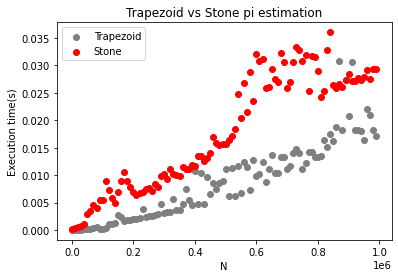

In [ ]:
plt.title('Trapezoid vs Stone pi estimation')
plt.scatter(x=d1['N'], y =d1['Time'], c='grey')
plt.scatter(x=d1['N'], y =d2['Time'], c='red')
plt.legend(['Trapezoid', 'Stone'])
plt.xlabel('N')
plt.ylabel('Execution time(s)')

Text(0, 0.5, 'Error')

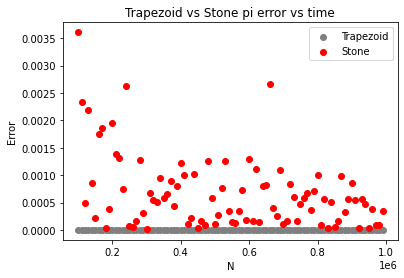

In [ ]:
plt.title('Trapezoid vs Stone pi error vs time')
plt.scatter(x=d1['N'].iloc[10:], y =d1['Error'].iloc[10:], c='grey')
plt.scatter(x=d1['N'].iloc[10:], y =d2['Error'].iloc[10:], c='red')
plt.legend(['Trapezoid', 'Stone'])
plt.xlabel('N')
plt.ylabel('Error')

### Don't run the crap below if interval has huge values

In [ ]:
d2 = takeMeasurements(intervals, piEstTrapezoidLoop)
d2.plot(kind = 'scatter', x = 'N', y='Time', title='Trapezoid Loop Estimation')
d2.plot(kind = 'scatter', x = 'N', y='Error', title='Trapezoid Loop Estimation')

plt.show()

KeyboardInterrupt: 

# Error estiamation

In [ ]:
v1 = np.ones(d1['Error'].shape)

Text(0, 0.5, 'Error')

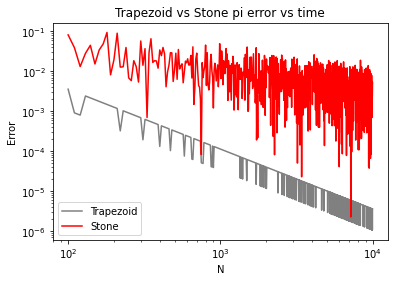

In [ ]:
plt.title('Trapezoid vs Stone pi error vs time')
plt.loglog(d1['N'].iloc[:], d1['Error'].iloc[:], c='grey')
plt.loglog(d1['N'].iloc[:], d2['Error'].iloc[:], c='red')
plt.legend(['Trapezoid', 'Stone'])
plt.xlabel('N')
plt.ylabel('Error')

In [ ]:
d1

,N,Time,Value of PI,Error
0,100,0.000047,3.130309,0.003592
1,110,0.000012,3.138711,0.000917
2,120,0.000027,3.139064,0.000805
3,130,0.000013,3.133973,0.002425
4,140,0.000008,3.134773,0.002171
...,...,...,...,...
985,9950,0.000031,3.141581,0.000004
986,9960,0.000030,3.141581,0.000004
987,9970,0.000031,3.141589,0.000001
988,9980,0.000031,3.141581,0.000004


In [ ]:
d2

,N,Time,Value of PI,Error
0,100,0.010018,3.400000,0.082254
1,110,0.000051,3.018182,0.039283
2,120,0.000064,3.100000,0.013239
3,130,0.000057,3.230769,0.028386
4,140,0.000056,3.000000,0.045070
...,...,...,...,...
985,9950,0.000202,3.126834,0.004698
986,9960,0.000220,3.148996,0.002357
987,9970,0.000186,3.129789,0.003757
988,9980,0.000186,3.132665,0.002842


In [ ]:
piEstStones(10000)

3.1496